In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

In [2]:
df =  pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df["Ratio_SepalLength:SepalWidth"] = df["SepalLengthCm"]/df["SepalWidthCm"]
df["Ratio_PetalLength:PetalWidth"] = df["PetalLengthCm"]/df["PetalWidthCm"]

In [61]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Ratio_SepalLength:SepalWidth,Ratio_PetalLength:PetalWidth
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,7.000000
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,7.000000
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,6.500000
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,7.500000
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,7.000000
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2.233333,2.260870
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2.520000,2.631579
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,2.600000
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1.823529,2.347826


In [62]:
X = df[["SepalLengthCm", "SepalWidthCm",	"PetalLengthCm"	,"PetalWidthCm", "Ratio_SepalLength:SepalWidth", "Ratio_PetalLength:PetalWidth"	]]

In [9]:
y = df["Species"]

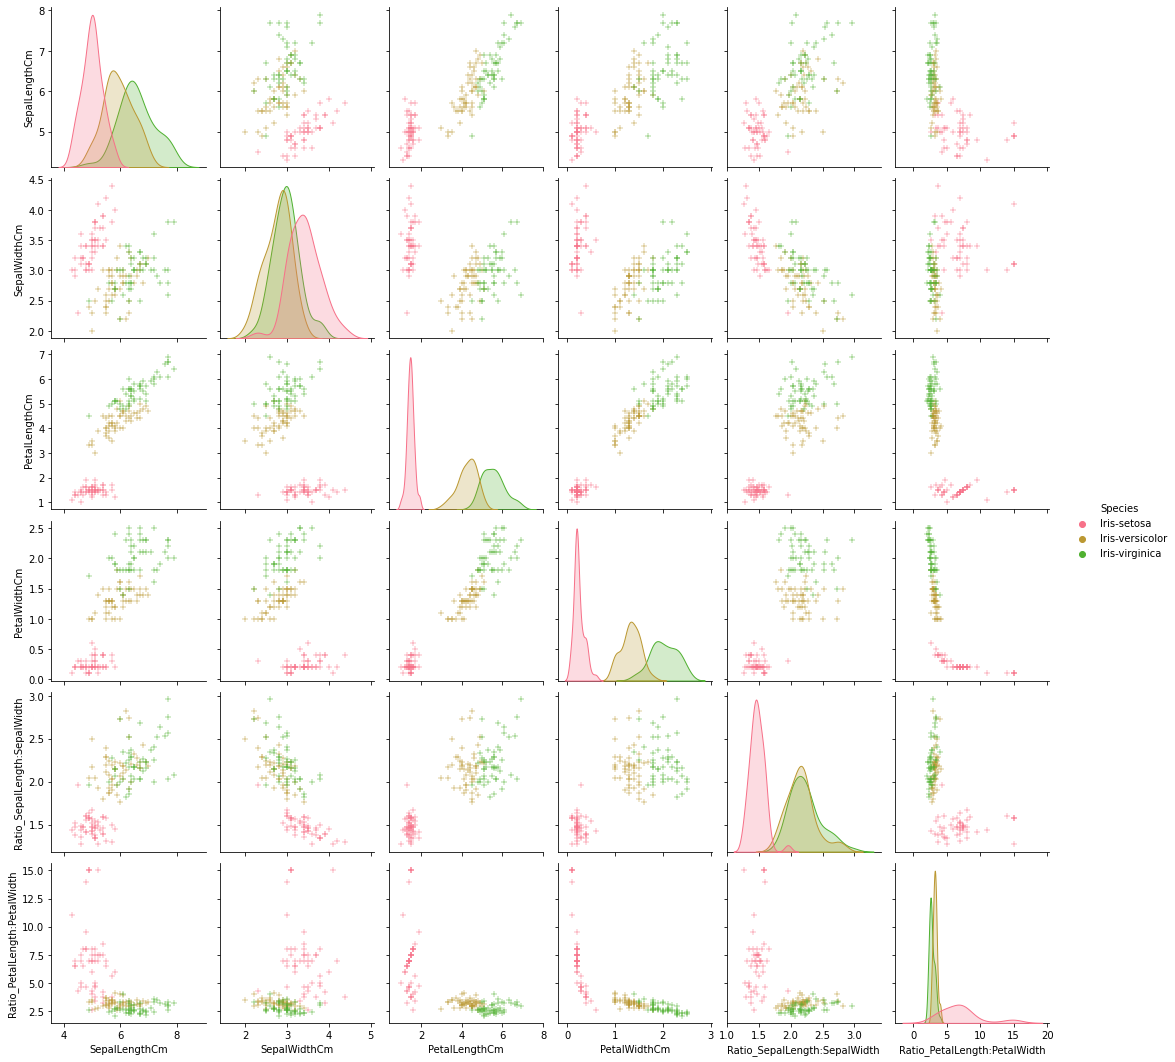

In [13]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [21]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
print("Ratio of Sepal Length to Sepal Width for Iris-setosa ",df[df["Species"] == "Iris-setosa"]["Ratio_SepalLength:SepalWidth"].mean())
print("Ratio of Sepal Length to Sepal Width for Iris-virginica ",df[df["Species"] == "Iris-virginica"]["Ratio_SepalLength:SepalWidth"].mean())
print("Ratio of Sepal Length to Sepal Width for Iris-versicolor ",df[df["Species"] == "Iris-versicolor"]["Ratio_SepalLength:SepalWidth"].mean())

Ratio of Sepal Length to Sepal Width for Iris-setosa  1.474578362026333
Ratio of Sepal Length to Sepal Width for Iris-virginica  2.230452738894224
Ratio of Sepal Length to Sepal Width for Iris-versicolor  2.1604021916878304


### virginica and versicolor are much closer and similar than setosa

In [28]:
print("Ratio of Sepal Length to Sepal Width for Iris-setosa ",df[df["Species"] == "Iris-setosa"]["Ratio_PetalLength:PetalWidth"].mean())
print("Ratio of Sepal Length to Sepal Width for Iris-virginica ",df[df["Species"] == "Iris-virginica"]["Ratio_PetalLength:PetalWidth"].mean())
print("Ratio of Sepal Length to Sepal Width for Iris-versicolor ",df[df["Species"] == "Iris-versicolor"]["Ratio_PetalLength:PetalWidth"].mean())

Ratio of Sepal Length to Sepal Width for Iris-setosa  7.077999999999999
Ratio of Sepal Length to Sepal Width for Iris-virginica  2.7806623384004454
Ratio of Sepal Length to Sepal Width for Iris-versicolor  3.2428369326751683


### again virginica and versicolor are much closer together than setosa

In [29]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [60]:
X_test.shape

(60, 6)

In [50]:
k_range = list(range(1,20))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [51]:
print(k_range)
print(scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667]


In [52]:
n_and_scores = {}
for k, v in zip(k_range, scores):
    n_and_scores.update({k: v})
n_and_scores

{1: 0.9833333333333333,
 2: 0.9833333333333333,
 3: 0.9833333333333333,
 4: 0.9833333333333333,
 5: 0.9833333333333333,
 6: 0.9833333333333333,
 7: 0.9833333333333333,
 8: 0.9833333333333333,
 9: 0.9833333333333333,
 10: 0.9833333333333333,
 11: 0.9833333333333333,
 12: 0.9833333333333333,
 13: 0.9833333333333333,
 14: 0.9833333333333333,
 15: 0.9833333333333333,
 16: 0.9833333333333333,
 17: 0.9833333333333333,
 18: 0.9833333333333333,
 19: 0.9666666666666667}

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2, 3, 7]])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [64]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Ratio_SepalLength:SepalWidth,Ratio_PetalLength:PetalWidth
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,7.000000
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,7.000000
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,6.500000
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,7.500000
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,7.000000
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2.233333,2.260870
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2.520000,2.631579
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,2.600000
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1.823529,2.347826


In [65]:
def predict(SepalLengthCm_guess, SepalWidthCm_guess,	PetalLengthCm_guess	,PetalWidthCm_guess, Ratio_SepalLength_SepalWidth_guess, Ratio_PetalLength_PetalWidth_guess):
    return knn.predict([[SepalLengthCm_guess, SepalWidthCm_guess,	PetalLengthCm_guess	,PetalWidthCm_guess, Ratio_SepalLength_SepalWidth_guess, Ratio_PetalLength_PetalWidth_guess]])
predict(5.1,3.5,1.4,0.2, 1.457143, 7.000000)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)